In [1]:
import csv
import re

In [32]:
rows = []
with open('tcdat.csv', 'r') as tcdatCSV:
    reader = csv.reader(tcdatCSV)
    for row in reader:
        rows.append(row)
print(len(rows))

9553952


In [34]:
images = []
for row in rows:
    images.append(row[-2].split('.'))

In [35]:
imgFieldSetLens = {}
examples = []
for img in images:
    if len(img) in imgFieldSetLens:
        imgFieldSetLens[len(img)] += 1
    else:
        imgFieldSetLens[len(img)] = 1
        examples.append(img)
        

In [36]:
extensions = {}
extExamples = []
for img in images:
    if img[-1] in extensions:
        extensions[img[-1]] += 1
    else:
        extensions[img[-1]] = 1
        extExamples.append(img)

In [37]:
count = 0
for img in images:
    if re.fullmatch('\d\d\d\d\d\d\d\d',img[0]) and not re.fullmatch('\d\d\d\d',img[1]):
        #print(img)
        count += 1

In [38]:
count = 0
for img in images:
    if re.match('\d\d\d\d\d\d\d\d',img[0]) and not re.fullmatch('\d\d\d\d\d\d\d\d',img[0]):
        #print(img)
        count += 1

In [3]:
basinSet = {}
with open('tcdat.csv', 'r') as tcdatCSV:
    reader = csv.reader(tcdatCSV)
    for row in reader:
        if row[1] in basinSet:
            basinSet[row[1]] += 1
        else:
            basinSet[row[1]] = 1
        

In [23]:
seasonSet = {}
with open('tcdat.csv', 'r') as tcdatCSV:
    reader = csv.reader(tcdatCSV)
    for row in reader:
        if row[0][2] == '9':
            row[0] = int('19' + row[0][2:])
        else:
            row[0] = int('20' + row[0][2:])
        if row[0] in seasonSet:
            if row[1] in seasonSet[row[0]]:
                seasonSet[row[0]][row[1]] += 1
            else:
                seasonSet[row[0]][row[1]] = 1
        else:
            seasonSet[row[0]] = {row[1]: 1}
       

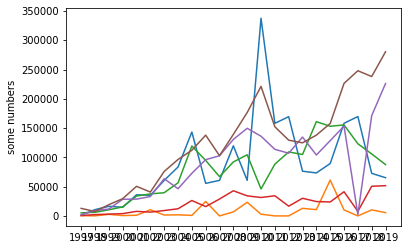

In [24]:
import matplotlib.pyplot as plt
basinList = list(basinSet.keys())
basinList.sort()
seasonList = list(seasonSet.keys())
seasonList.sort()
pltList = []
for i in range(len(basinList)):
    pltList.append([])
    for j in range(len(seasonList)):
        if basinList[i] in seasonSet[seasonList[j]]:
            pltList[i].append(seasonSet[seasonList[j]][basinList[i]])
        else:
            pltList[i].append(0)
for l in pltList:
    plt.plot(l)
plt.xticks(range(len(seasonList)),seasonList)
plt.ylabel('some numbers')
plt.show()
